# **Movie Rating Prediction Using Regression Techniques**

**Objective:**

The goal of this project is to predict the ratings of movies based on features like genre, director, and actors using regression techniques. This project involves data analysis, preprocessing, feature engineering, and building machine learning models to estimate movie ratings accurately. The project also includes data visualization to provide insights into the dataset and model performance.

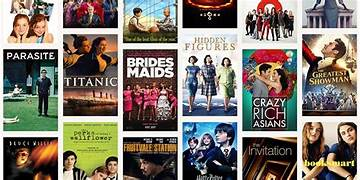

# Importing Libraries and Loading the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib


sns.set(style="whitegrid")


In [ ]:
df = pd.read_csv('/content/IMDb Movies India.csv',encoding='latin-1')


In [ ]:
print(df.head())
print(df.info())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

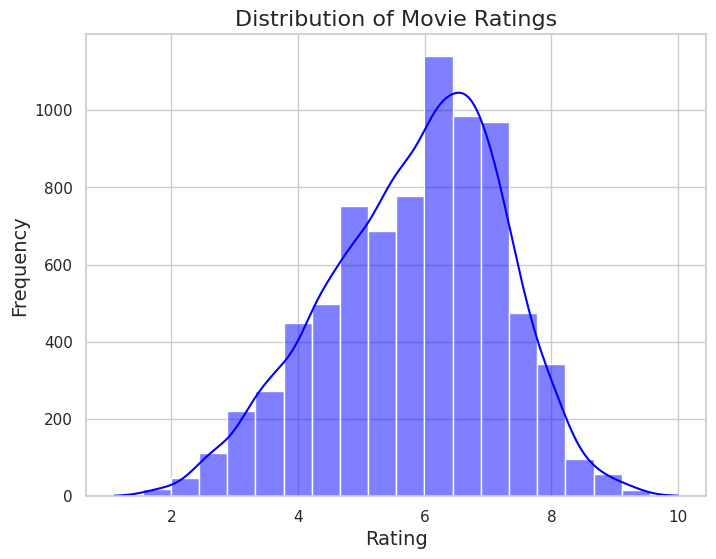

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Movie Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


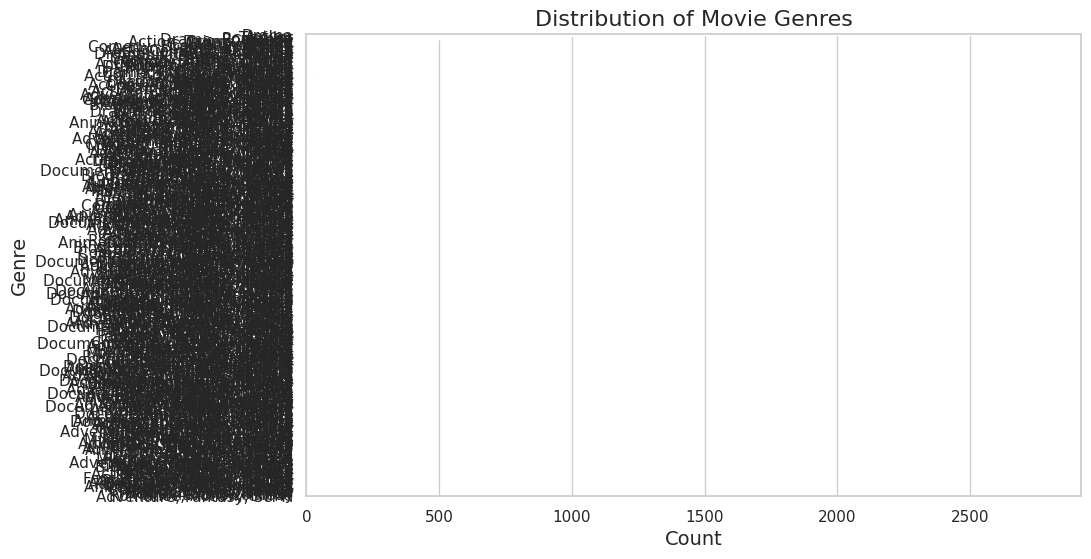

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Genre'], order=df['Genre'].value_counts().index)
plt.title('Distribution of Movie Genres', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.show()


In [ ]:
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df.loc[:, col] = df[col].fillna('Unknown')
label_encoders = {}
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    le = LabelEncoder()
    df.loc[:, col] = le.fit_transform(df[col])
    label_encoders[col] = le

Column 'Name' contains non-numeric values:
Name
Baazi                          4
Zindagi                        4
Guru                           4
Ittefaq                        3
Andaz                          3
                              ..
Gopi Kishan                    1
Gopi                           1
Gopal Krishna                  1
Goopi Gawaiya Bagha Bajaiya    1
Zulm-O-Sitam                   1
Name: count, Length: 5385, dtype: int64
Column 'Votes' contains non-numeric values:
Votes
7         90
10        87
9         87
13        74
8         71
          ..
402        1
7,441      1
5,798      1
13,768     1
1,496      1
Name: count, Length: 2027, dtype: int64


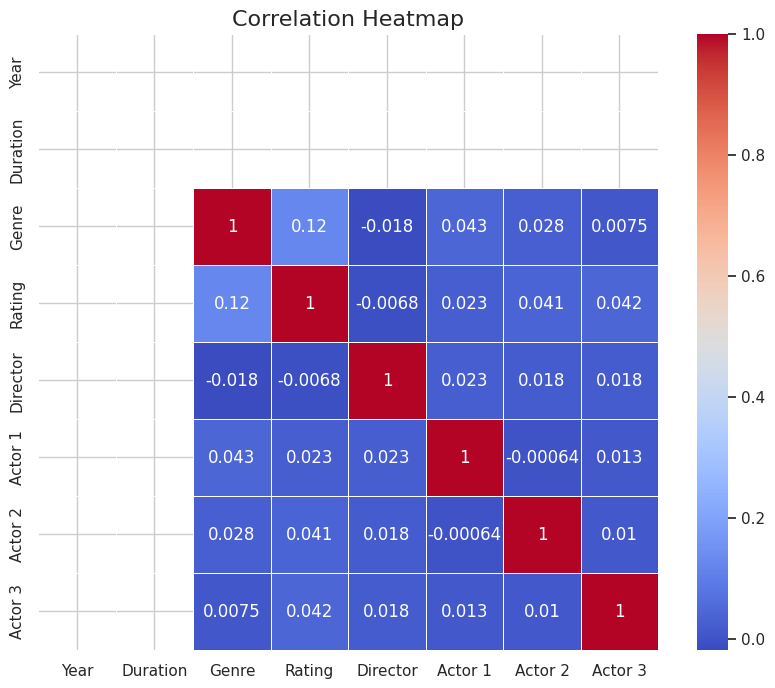

In [ ]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Column '{col}' contains non-numeric values:")
        print(df[col].value_counts())
plt.figure(figsize=(10, 8))
corr_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


In [ ]:
X = df[['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']]  # Features
y = df['Rating']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


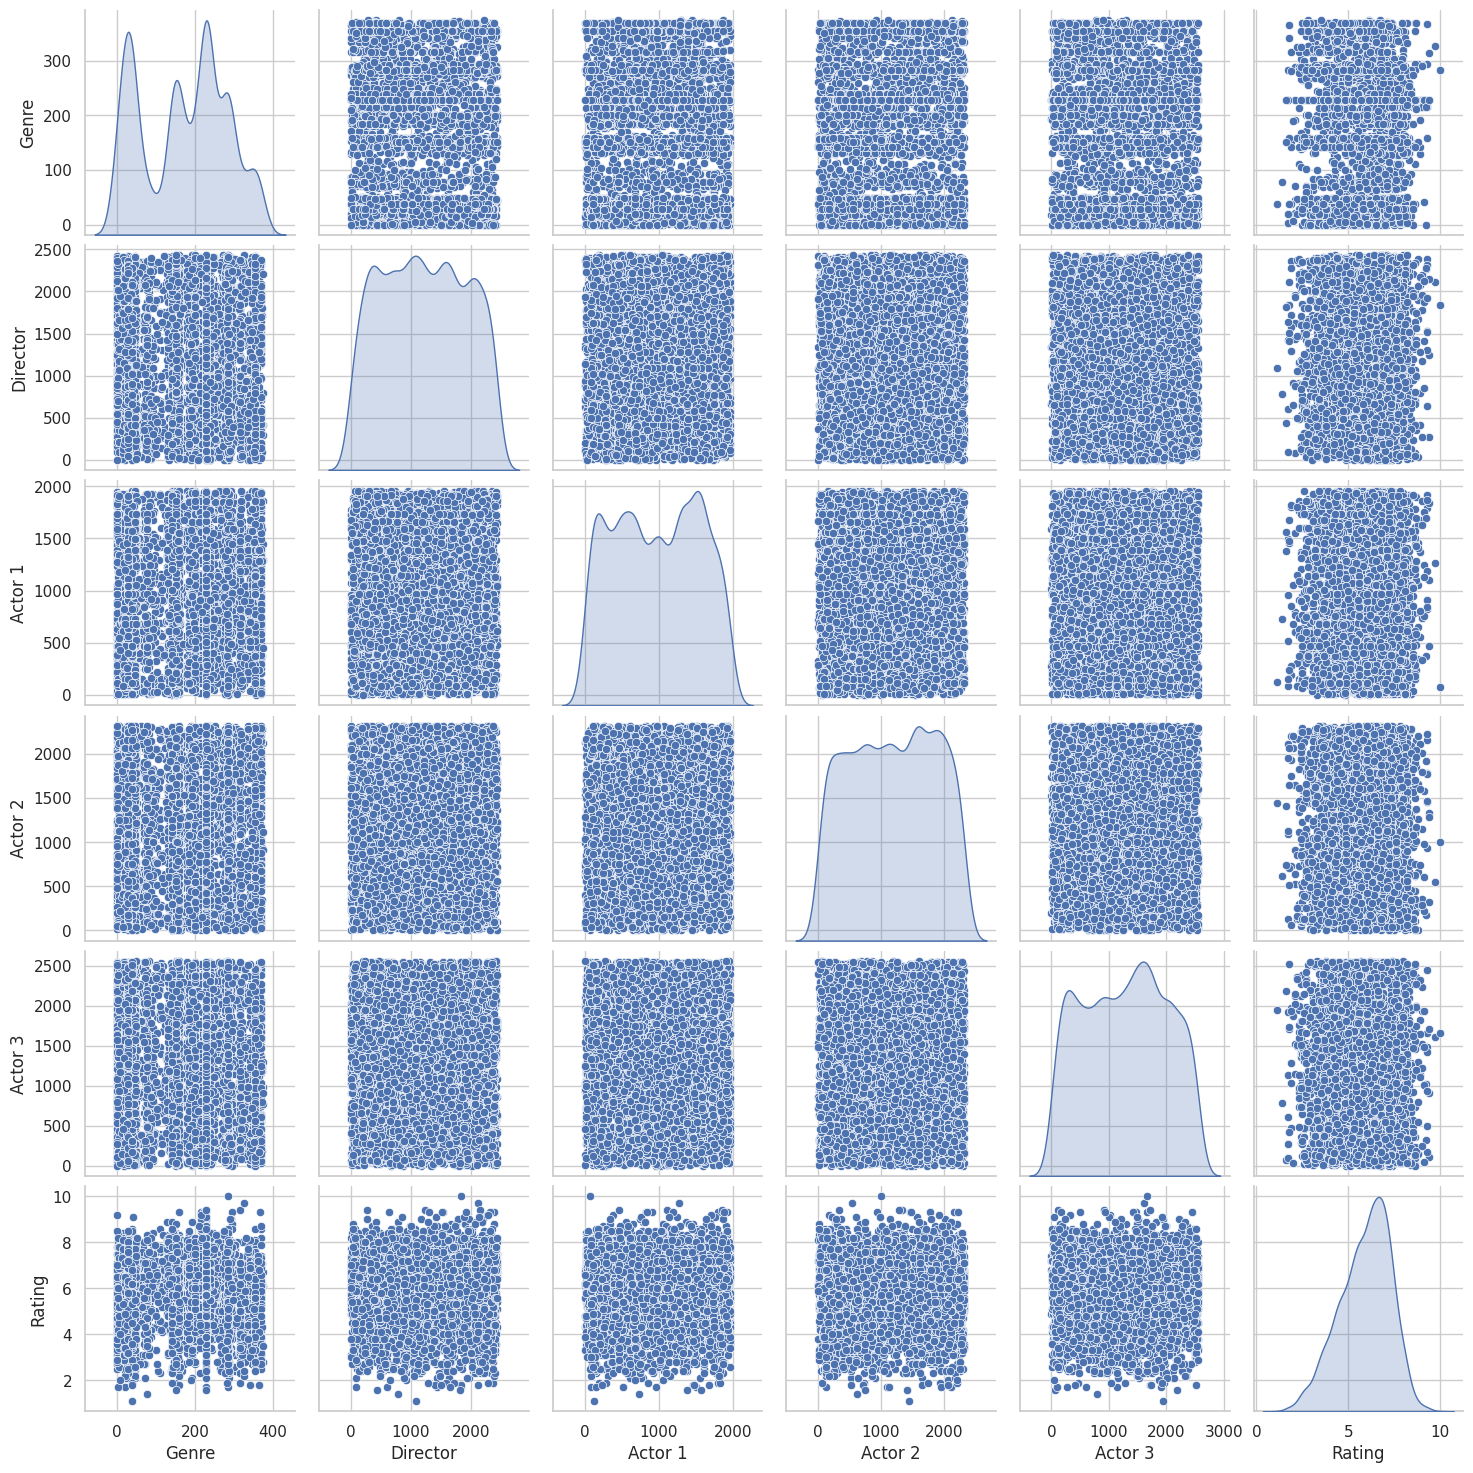

In [ ]:
sns.pairplot(df[['Genre', 'Director', 'Actor 1','Actor 2','Actor 3', 'Rating']], diag_kind='kde')
plt.show()


# Building and Training the Linear Regression Model

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}, R2: {r2_lr}')



Linear Regression MSE: 1.824204245176786, R2: 0.014872145511032775


In [ ]:
y_pred = model.predict(X_test)


# Model Evaluation

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.824204245176786
R-squared: 0.014872145511032775


# Visualizing Predicted vs Actual Movie Ratings

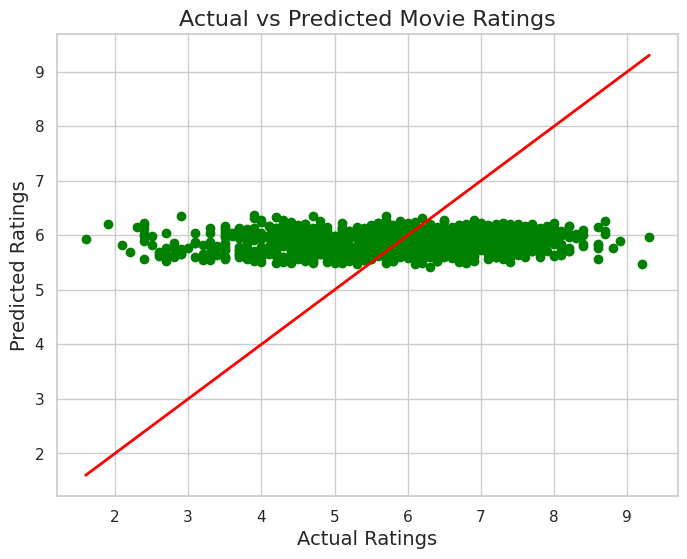

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Movie Ratings', fontsize=16)
plt.xlabel('Actual Ratings', fontsize=14)
plt.ylabel('Predicted Ratings', fontsize=14)
plt.show()


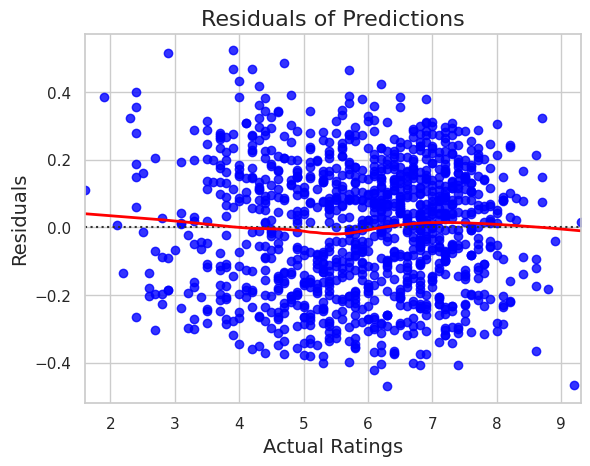

In [ ]:
sns.residplot(x=y_test, y=y_pred, lowess=True, color='blue', line_kws={'color': 'red', 'lw': 2})
plt.title('Residuals of Predictions', fontsize=16)
plt.xlabel('Actual Ratings', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()


# Saving the Model for Future Use

In [ ]:
joblib.dump(model, 'movie_rating_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']